# Folium Library

In [1]:
import folium

In [8]:
latitude, longitude = (37.4971778, 126.9275993)

In [9]:
m = folium.Map(location = [latitude, longitude], zoom_start = 17, width = 750, height = 500)
folium.Marker([latitude, longitude], popup = "플레이데이터", tooltip = "플레이데이터").add_to(m)

m

In [15]:
popup_tag = """
<div style = "width:100px">
  <a href = "https:/playdata.io/">
    플레이데이터
  </a>
</div>
"""

In [28]:
m = folium.Map(location = [latitude, longitude], zoom_start = 17, width = 750, height = 500)
folium.Marker(location = (latitude, longitude), popup = popup_tag, tooltip = "플레이데이터").add_to(m)
m

# 지도 그리기

## json으로 데이터 가져오기 - 국가별 경계에 대한 지도의 위도/경도 값

In [12]:
import requests
import json

In [18]:
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)
data_json = response.json()
data_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AFG',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[61.210817, 35.650072],
      [62.230651, 35.270664],
      [62.984662, 35.404041],
      [63.193538, 35.857166],
      [63.982896, 36.007957],
      [64.546479, 36.312073],
      [64.746105, 37.111818],
      [65.588948, 37.305217],
      [65.745631, 37.661164],
      [66.217385, 37.39379],
      [66.518607, 37.362784],
      [67.075782, 37.356144],
      [67.83, 37.144994],
      [68.135562, 37.023115],
      [68.859446, 37.344336],
      [69.196273, 37.151144],
      [69.518785, 37.608997],
      [70.116578, 37.588223],
      [70.270574, 37.735165],
      [70.376304, 38.138396],
      [70.806821, 38.486282],
      [71.348131, 38.258905],
      [71.239404, 37.953265],
      [71.541918, 37.905774],
      [71.448693, 37.065645],
      [71.844638, 36.738171],
      [72.193041, 36.948288],
      [72.63689, 37.047

In [20]:
len(data_json["features"])  # "features" 자료형이 Dictionary

180

In [21]:
for feature in data_json["features"]:
    print(feature)
    break

{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388]

In [42]:
countries_name = [feature["properties"]["name"] for feature in data_json["features"]]
sorted(countries_name)

# json에 있는 국가 리스트 출력

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'Ind

## CSV 파일로 데이터 가져오기 - 설문 데이터

### 시행착오

이미 집계된 데이터에 대해서 수정한 것보다는 원 데이터에 대해 먼저 전처리를 해야 함

In [24]:
import pandas as pd

In [35]:
schema_raw = pd.read_csv("datas/survey_results_schema.csv", index_col="qname")["question"]
schema_raw["Country"]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [37]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({"Country": country_counts.index, "Count": country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [43]:
rename_data = {'Republic of Korea': 'South Korea', 
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
               'Viet Nam': 'Vietnam', 'Russian Federation': 'Russia'}

In [44]:
country_counts_df.replace(rename_data)

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [45]:
country_counts_df.replace(rename_data, inplace = True)

In [47]:
sorted(country_counts_df.Country.values)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong (S.A.R.)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Iraq

In [41]:
set(country_counts_df.Country).symmetric_difference(countries_name)

{'Andorra',
 'Antarctica',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Brunei Darussalam',
 'Burundi',
 'Cape Verde',
 'Central African Republic',
 'Congo, Republic of the...',
 "Côte d'Ivoire",
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Guinea Bissau',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Iran, Islamic Republic of...',
 'Isle of Man',
 'Ivory Coast',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macedonia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Monaco',
 'New Caledonia',
 'Nomadic',
 'Northern Cyprus',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Korea',
 'Republic of Moldova',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Somaliland',
 'South Sudan',
 'Syria',
 '

In [62]:
m = folium.Map(location=[30, 0], zoom_start=2)
folium.Choropleth(geo_data = url, data=country_counts_df, columns = ['Country', 'Count'],
                  key_on = 'feature.properties.name',
                  threshold_scale = [1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],
                  fill_color = 'YlGn',
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = 'Respondents',).add_to(m)
folium.LayerControl().add_to(m)

m

In [63]:
folium.Choropleth(geo_data = url,
                  data = country_counts_df, columns = ["Country", "Count"],
                  key_on = "feature.properties.name",
                  threshold_scale = [1, 30, 100, 300, 1000, 3000, 10000, 14000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "Respondents").add_to(m)

folium.LayerControl().add_to(m)
m

In [59]:
m.save("Country.html")

## 방법 2

In [71]:
country = survey_raw_df["Country"].copy()
country

ResponseId
1                                                      NaN
2                                                   Canada
3        United Kingdom of Great Britain and Northern I...
4                                                   Israel
5                                 United States of America
                               ...                        
73264                                              Nigeria
73265                             United States of America
73266                             United States of America
73267    United Kingdom of Great Britain and Northern I...
73268                                               Canada
Name: Country, Length: 73268, dtype: object

In [72]:
rename_data = {'Republic of Korea': 'South Korea', 
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
               'Viet Nam': 'Vietnam', 'Russian Federation': 'Russia'}

In [73]:
country.replace(rename_data, inplace = True)

In [74]:
country_counts = country.value_counts()
country_counts_df = pd.DataFrame({"Country":country_counts.index,
                                  "Count":country_counts.values
})

In [75]:
folium.Choropleth(geo_data = url,
                  data = country_counts_df, columns = ["Country", "Count"],
                  key_on = "feature.properties.name",
                  threshold_scale = [1, 30, 100, 300, 1000, 3000, 10000, 14000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "Respondents").add_to(m)

folium.LayerControl().add_to(m)
m

## 다른 예제

In [76]:
seoul_geojson = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(location = [37.57, 126.99], zoom_start = 11)

folium.Choropleth(geo_data = seoul_geojson,
                  fill_color = "#22AA44",
                  fill_opacity = 0.4,
                  line_opacity = 1
).add_to(m)

m

# Wordcloud

In [77]:
from wordcloud import WordCloud

In [80]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col = "ResponseId")
survey_raw_df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [88]:
dev_type = survey_raw_df.DevType.copy()
dev_type

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [89]:
dev_type.dropna(inplace = True)

In [91]:
dev_type = dev_type.str.replace(";", " ").str.replace(",", " ")
dev_type

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [93]:
words = ' '.join(dev_type)
# words (너무 길어서 찍지 말 것)

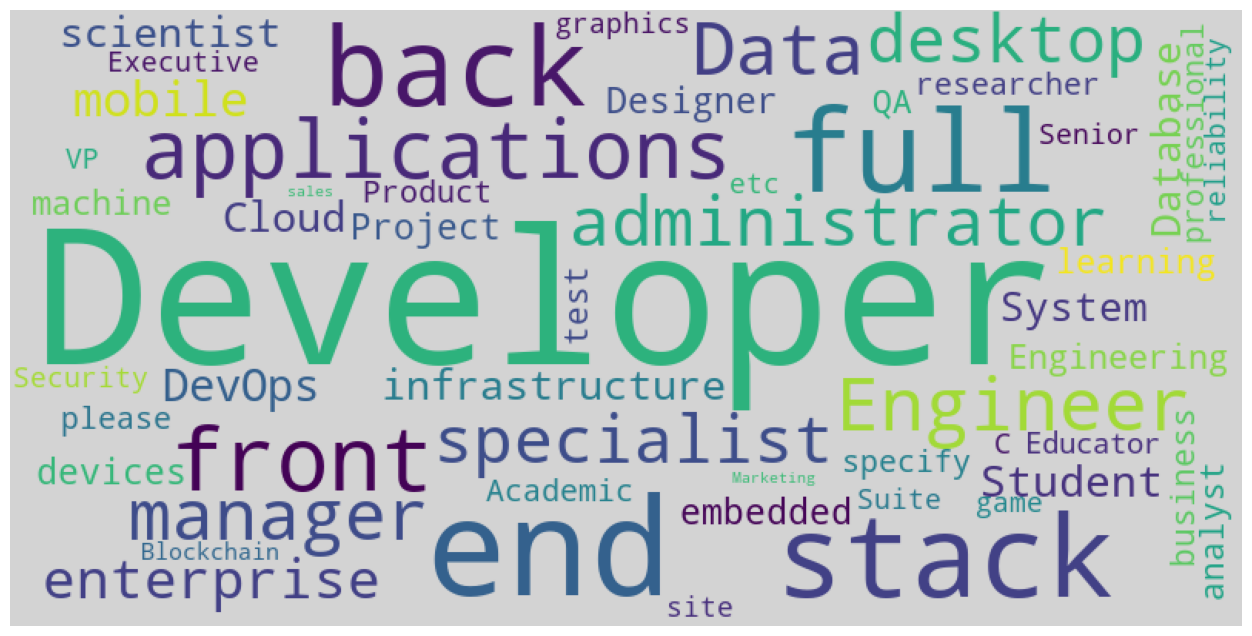

In [94]:
import matplotlib.pyplot as plt

wc = WordCloud(collocation_threshold = int(1e6),
               width = 800, height = 400,
               background_color = "lightgrey").generate(words)

plt.figure(figsize = (16, 8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc)  # image show의 약자
plt.show()

In [95]:
wc.to_file("datas/DevType.png")